In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import RidgeCV

# Data generating process

In [96]:
# turn into function
# simulate 0.01 - 0.10
# show the contribution
# relationship between VIF and bias (random simulation)
# when we have mult-collinearty how does pymc compare?
# what about with priors?

In [97]:
np.random.seed(42)

# Parameter for adding random variation to marketing spend
spend_rand_change = 0.25

# Parameters for initial components
start_date = "2018-01-01"
periods = 365 * 3  # Daily data for three years
trend = 0.01  # Linear trend component
seasonal_amplitude = 5  # Amplitude of the seasonal component
seasonal_period = 30.44 # Monthly
noise_level = 5  # Level of random noise

# Create initial components
time = np.arange(periods)
date_range = pd.date_range(start=start_date, periods=periods)
trend_component = trend * time
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * time / seasonal_period)
noise_component = noise_level * np.random.randn(periods)
demand = 100 + trend_component + seasonal_component + noise_component

# Initial demand series
df = pd.DataFrame({'date': date_range, 'demand': demand})

# Create demand forecast
df['demand_forecast'] = df['demand'] * np.random.uniform(0.75, 1.25, len(df))

# Create social media and tv spend
df['social_spend'] = df['demand_forecast'] * 10 * np.random.uniform(1 - spend_rand_change, 1 + spend_rand_change, len(df))
df['tv_spend'] = df['demand_forecast'] * 20 * np.random.uniform(1 - spend_rand_change, 1 + spend_rand_change, len(df))

# Create sales
df['sales'] = df['demand'] * 0.30 + df['social_spend'] * 0.02 + df['tv_spend'] * 0.01
sales_noise = 0.1 * df['sales'] * np.random.randn(len(df))
df['sales'] = df['sales'] + sales_noise

df

,date,demand,demand_forecast,social_spend,tv_spend,sales
0,2018-01-01,102.483571,93.063081,1129.033210,1927.578816,72.015509
1,2018-01-02,100.343426,100.706409,764.923632,1654.607428,70.615796
2,2018-01-03,105.264432,81.136396,801.969772,1520.940885,60.428525
3,2018-01-04,110.547217,91.109877,996.615427,2093.461030,77.808354
4,2018-01-05,102.544172,127.494713,1416.916928,2380.824450,78.890443
...,...,...,...,...,...,...
1090,2020-12-26,105.871999,82.710254,695.939704,1447.407029,55.276084
1091,2020-12-27,106.519144,126.942313,1476.155634,1997.264733,94.341651
1092,2020-12-28,110.997164,108.128945,965.433376,2338.987217,74.040357
1093,2020-12-29,108.423689,108.989253,1322.652041,2283.724158,87.235747


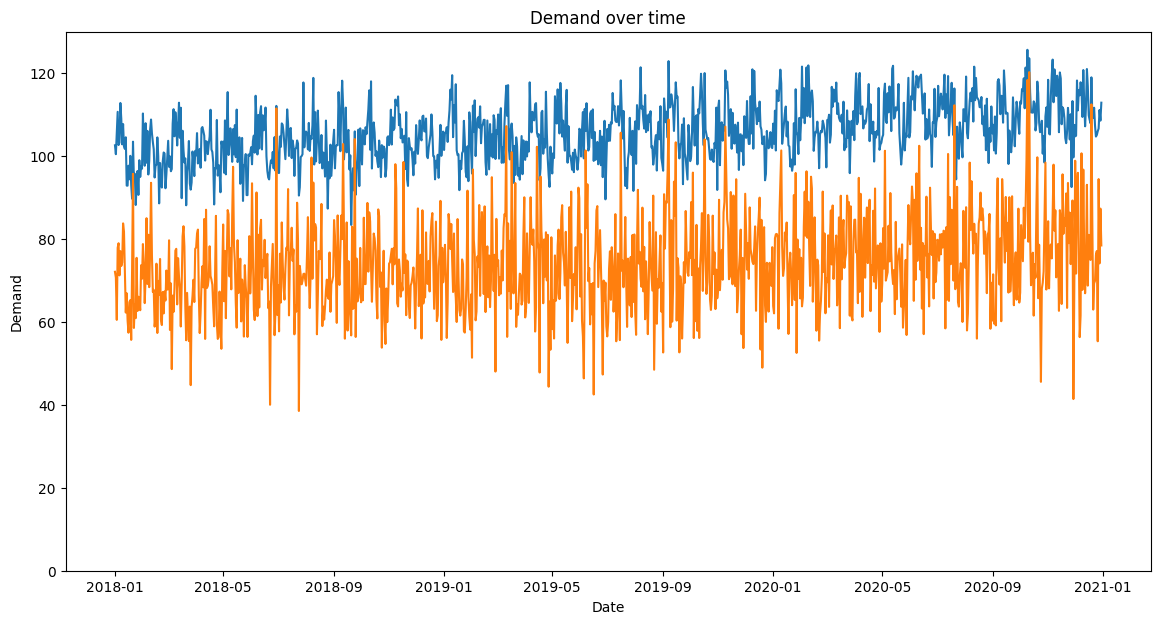

In [98]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['demand'], label='Demand')
plt.plot(df['date'], df['sales'], label='Sales')
plt.title('Demand over time')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.ylim(bottom=0)
plt.show()

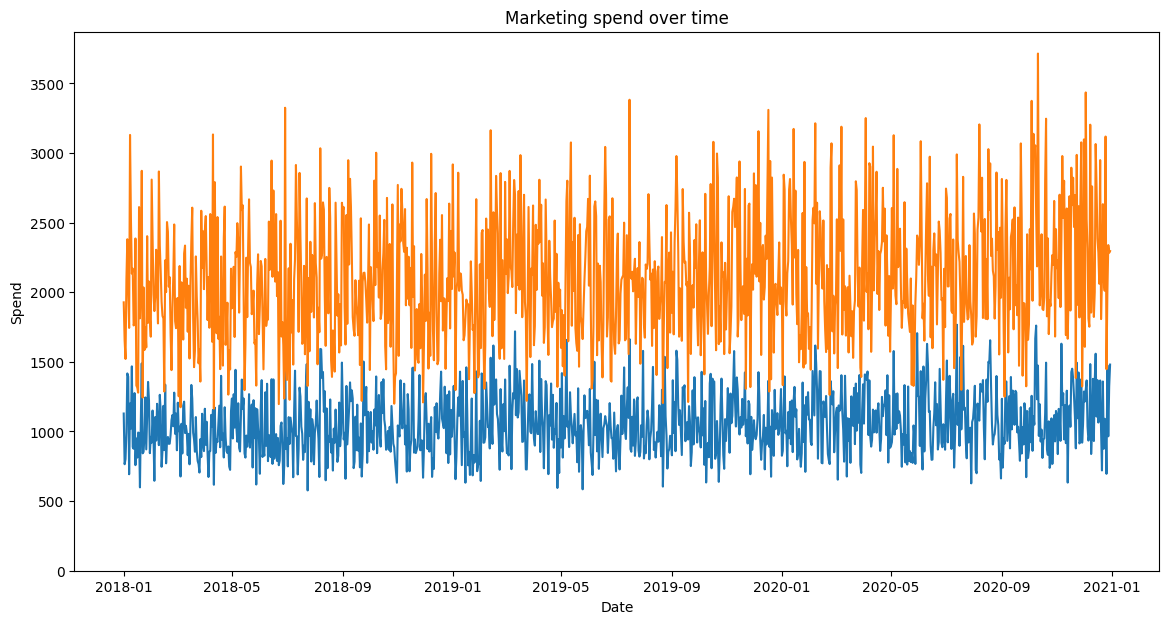

In [99]:
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['social_spend'], label='Social Spend')
plt.plot(df['date'], df['tv_spend'], label='TV Spend')
plt.title('Marketing spend over time')
plt.xlabel('Date')
plt.ylabel('Spend')
plt.ylim(bottom=0)
plt.show()

In [106]:
features = [
    "demand",
    "social_spend",
    "tv_spend"
]

target = "sales"

vif_data = pd.DataFrame()
vif_data['feature'] = features
vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif_data

,feature,VIF
0,demand,33.443767
1,social_spend,33.951484
2,tv_spend,33.750188


In [107]:
X = df[features].values
y = df[target].values

clf = RidgeCV(alphas=1.0)
clf.fit(X, y)

print(f'Intercept: {clf.intercept_}')
print(f'Coefficient: {clf.coef_}')

Intercept: -1.3443191758639443
Coefficient: [0.31643593 0.01840567 0.01058743]
